In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data=pd.read_csv('drive/My Drive/Colab Notebooks/Wine.csv')

In [4]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [5]:
from sklearn.model_selection import train_test_split


X=data.iloc[:,0:13].values
y=data.iloc[:,13].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394])

In [8]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0)
regressor.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = regressor.predict(X_test_pca)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [11]:
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy",prediction*100,'%')

Accuracy 97.22222222222221 %


<ipython-input-12-20565a78c0e3>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


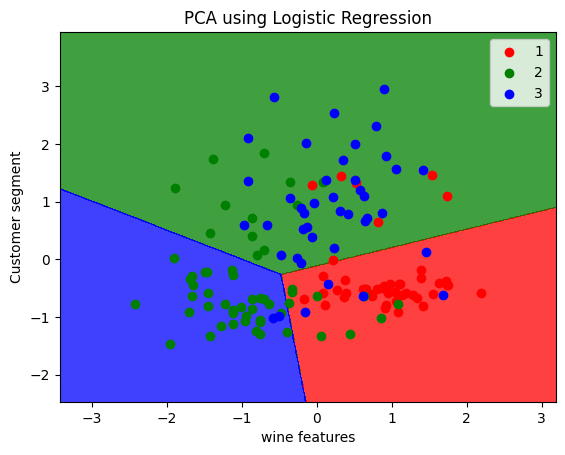

In [12]:
from matplotlib.colors import ListedColormap

# Splitting the dataset assignments
x_set, y_set = X_train, y_train

# Creating a meshgrid
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Plotting the decision boundaries
plt.contourf(x1, x2, regressor.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green','blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# If you want to also plot the training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green','blue'))(i), label=j)

plt.title('PCA using Logistic Regression')
plt.xlabel('wine features')
plt.ylabel('Customer segment')
plt.legend()
plt.show()